In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from ema_workbench.analysis import prim
from ema_workbench.util import ema_logging, utilities

ema_logging.log_to_stderr(ema_logging.INFO)

<Logger EMA (DEBUG)>

In [8]:
results = utilities.load_results('Outcomes/1000ScenariosBaseCase.csv')

experiments, outcomes = results
outcomes = pd.DataFrame(outcomes)
experiments = pd.DataFrame(experiments)
results = experiments.join(outcomes)
results = results.drop(columns="model")
# results = results.apply(pd.to_numeric)
results.head()

[MainProcess/INFO] results loaded succesfully from C:\Users\newbi\project-local\Model-based-decision-making\epa1361_open\final assignment\Outcomes\1000ScenariosBaseCase.csv


A.0_ID flood wave shape    A.1_Bmax A.1_Brate  A.1_pfail    A.2_Bmax  \
0                     64.0  341.707998      10.0   0.008967  329.059434   
1                     49.0  270.516534       1.0   0.389864   64.116779   
2                    109.0  217.092157       1.0   0.720433  119.844801   
3                    106.0  314.195207       1.0   0.000931  149.934556   
4                    123.0  331.097660       1.5   0.138750  275.055604   

  A.2_Brate  A.2_pfail    A.3_Bmax A.3_Brate  A.3_pfail  ...  \
0       1.0   0.671443   46.836038       1.0   0.541864  ...   
1       1.0   0.458602  211.600292       1.5   0.030226  ...   
2       1.5   0.445405  332.843340      10.0   0.123183  ...   
3      10.0   0.203409  177.126583       1.5   0.900999  ...   
4       1.0   0.296295  172.209395       1.5   0.888339  ...   

   A.3_Dike Investment Costs 2 A.3_Expected Number of Deaths 2  \
0                            0                        0.000000   
1                            0                        1.053592   
2                            0                        1.091069   
3                            0                        0.000000   
4                            0                        0.000000   

   A.4_Expected Annual Damage 2  A.4_Dike Investment Costs 2  \
0                           0.0                            0   
1                           0.0                            0   
2                           0.0                            0   
3                           0.0                            0   
4                           0.0                            0   

  A.4_Expected Number of Deaths 2  A.5_Expected Annual Damage 2  \
0                             0.0                           0.0   
1                             0.0                           0.0   
2                             0.0                           0.0   
3                             0.0                           0.0   
4                             0.0                           0.0   

  A.5_Dike Investment Costs 2 A.5_Expected Number of Deaths 2  \
0                           0                             0.0   
1                           0                             0.0   
2                           0                             0.0   
3                           0                             0.0   
4                           0                             0.0   

  RfR Total Costs 2  Expected Evacuation Costs 2  
0               0.0                          0.0  
1               0.0                          0.0  
2               0.0                          0.0  
3               0.0                          0.0  
4               0.0                          0.0  

[5 rows x 103 columns]

In [20]:
# Aggregate the outcomes (no location and no time step)

def aggregate_outcomes(results, outcome):
    list_outcomes_columns = []
    
    for i in results.columns:
        if outcome in i:
            list_outcomes_columns.append(i)
            
    results["Total " + str(outcome)] = results[list_outcomes_columns].sum(axis = 1)
            
#     print(list_outcomes_columns)

In [23]:
aggregate_outcomes(results, "Expected Number of Deaths")
aggregate_outcomes(results, "Expected Annual Damage")
aggregate_outcomes(results, "Dike Investment Costs")
aggregate_outcomes(results, "RfR Total Costs")

In [24]:
results.columns

Index(['A.0_ID flood wave shape', 'A.1_Bmax', 'A.1_Brate', 'A.1_pfail',
       'A.2_Bmax', 'A.2_Brate', 'A.2_pfail', 'A.3_Bmax', 'A.3_Brate',
       'A.3_pfail',
       ...
       'A.4_Expected Number of Deaths 2', 'A.5_Expected Annual Damage 2',
       'A.5_Dike Investment Costs 2', 'A.5_Expected Number of Deaths 2',
       'RfR Total Costs 2', 'Expected Evacuation Costs 2',
       'Total Expected Number of Deaths', 'Total Expected Annual Damage',
       'Total Dike Investment Costs', 'Total RfR Total Costs'],
      dtype='object', length=107)

In [132]:
def boxplot_histogram_maker(results):
    fig, axes = plt.subplots(1, 2, figsize=(10, 3))
    outcomes_list = ["Total Expected Number of Deaths", "Total Expected Annual Damage"]
    
    for i, (ax, outcome) in enumerate(zip(axes.flatten(), outcomes_list)):
        ax.boxplot(results[outcome])
        print(str(outcome) + " First quantile: " + str(results[outcome].quantile(q = 0.25)))
        print(str(outcome) + " Mean: " + str(results[outcome].mean()))

Total Expected Number of Deaths First quantile: 1.229327036452088
Total Expected Number of Deaths Mean: 3.23150710663596
Total Expected Annual Damage First quantile: 583888960.7998052
Total Expected Annual Damage Mean: 1678899372.4850564


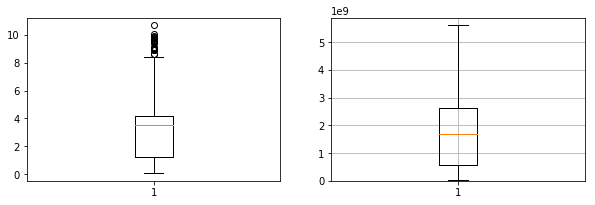

In [133]:
boxplot_histogram_maker(results)

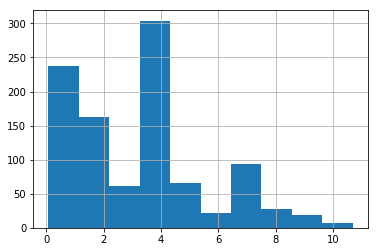

In [136]:
results["Total Expected Number of Deaths"].hist()

In [71]:
x = results.iloc[:, :19]
y_deaths = results["Total Expected Number of Deaths"].values

In [69]:
y_deaths = y_deaths < 1

In [70]:
prim_alg = prim.Prim(x, y_deaths, threshold=0.65, peel_alpha=0.1)
box1 = prim_alg.find_box()

[MainProcess/INFO] 1000 points remaining, containing 209 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.131, coverage: 0.6267942583732058, density: 1.0 restricted_dimensions: 4


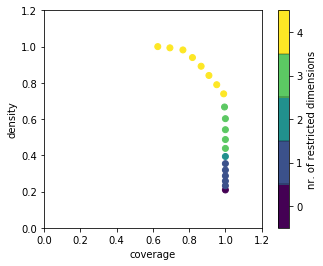

In [57]:
# Coverage is the points of interests in the red box 
# Density is fraction of cases in the box
# 

box1.show_tradeoff()
plt.show()

coverage    0.626794
density            1
id                19
mass           0.131
mean               1
res_dim            4
Name: 19, dtype: object

             box 19                                          
                min       max                       qp values
A.3_pfail  0.464105  0.999879  [1.9486298346508073e-37, -1.0]
A.1_pfail  0.494135  0.999122  [1.0903343161155638e-36, -1.0]
A.5_pfail  0.349070  0.999596    [9.22847861535647e-14, -1.0]
A.2_pfail  0.178197  0.999189    [4.97760946496621e-11, -1.0]



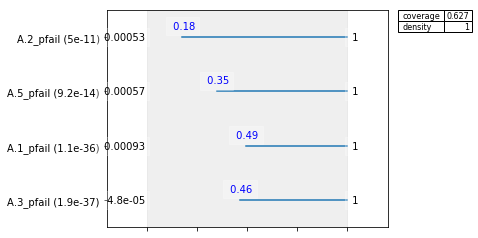

In [58]:
box1.inspect()
box1.inspect(style='graph')
plt.show()

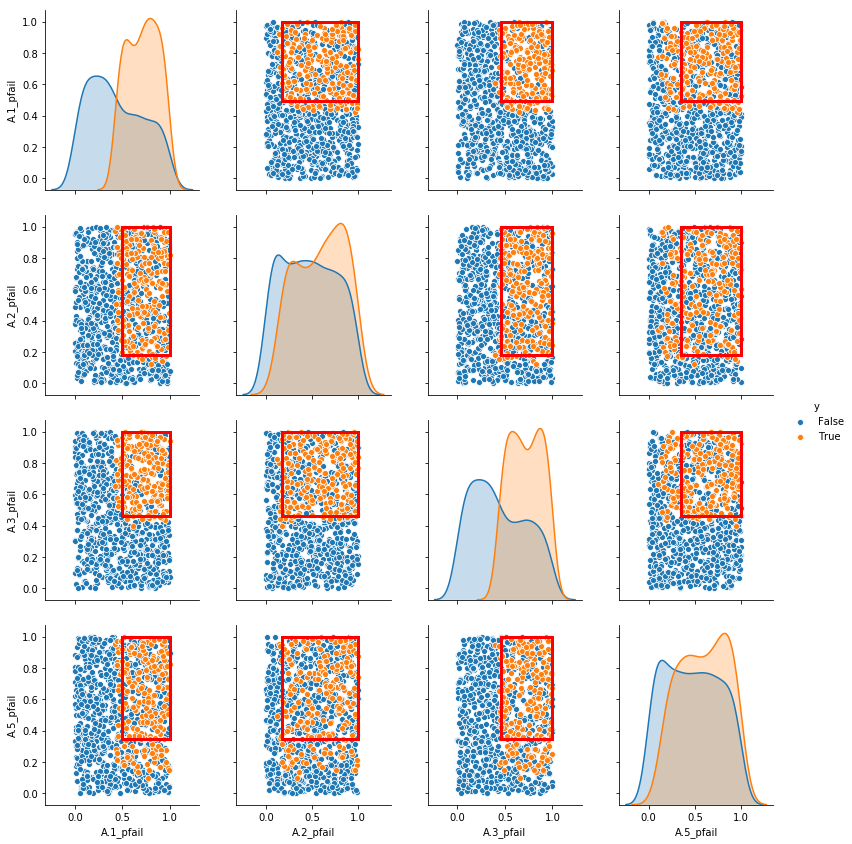

In [60]:
box1.select(19)
box1.show_pairs_scatter()
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()